In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filepath = os.path.join("data", "INMET.csv")
df = pd.read_csv(filepath, sep=';', skiprows=16)
df.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000,NaN
1,83714,01/01/1961,1200,NaN,NaN,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667,NaN
3,83714,02/01/1961,1200,16.3,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333,NaN


# verificando e corrigindo dados

In [5]:
df.columns[11]

'Unnamed: 11'

In [6]:
#elimina coluna com variável inexistente
dfcor = df.drop('Unnamed: 11', axis=1)
dfcor.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83714,01/01/1961,0,NaN,20.2,NaN,0.0,NaN,17.12,94.75,3.000000
1,83714,01/01/1961,1200,NaN,NaN,14.8,NaN,NaN,NaN,NaN,NaN
2,83714,02/01/1961,0,NaN,20.3,NaN,0.0,0.2,16.74,99.50,3.666667
3,83714,02/01/1961,1200,16.3,NaN,15.0,NaN,NaN,NaN,NaN,NaN
4,83714,03/01/1961,0,NaN,23.8,NaN,0.0,0.2,18.96,92.25,2.333333


In [7]:
#Corrigindo TempMinima e Precipitacao
#Splita rows por hora em 2 dataframes
dfTemp12 = dfcor[dfcor.Hora == 1200]
dfTemp00 = dfcor[dfcor.Hora == 0]

#Imprime dimensoes de ambos subsets e do dataset completo
print("dfTemp00.shape: "+str(dfTemp00.shape)+
      "\ndfTemp12.shape: "+str(dfTemp12.shape)+
      "\ndfEstCamposCorrigido.shape: "+str(dfcor.shape)
     )

dfTemp00.shape: (18658, 11)
dfTemp12.shape: (18974, 11)
dfEstCamposCorrigido.shape: (37632, 11)


In [8]:
#Define chaves para join
dfTemp00['chave'] = dfTemp00["Estacao"].map(str) + dfTemp00["Data"].map(str)
dfTemp12['chave'] = dfTemp12["Estacao"].map(str) + dfTemp12["Data"].map(str)

#Evidencia variaveis TemMinima e Precipitacao deletando demais colunas
dfTemp12.drop(dfTemp12.columns[[0,1,2,4,6,7,8,9,10]], axis=1, inplace=True)
dfTemp12.head()

C:\Users\tati\Anaconda3\envs\tera-fev2018\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tati\Anaconda3\envs\tera-fev2018\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tati\Anaconda3\envs\tera-fev2018\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

,Precipitacao,TempMinima,chave
1,NaN,14.8,8371401/01/1961
3,16.3,15.0,8371402/01/1961
5,27.9,14.8,8371403/01/1961
7,0.0,13.2,8371404/01/1961
9,27.8,12.4,8371405/01/1961


In [9]:
#Faz o join
dfjoin = dfTemp00.set_index('chave').join(dfTemp12.set_index('chave'), lsuffix='_00', rsuffix='_12')
dfjoin["TempMinima_00"].mean()
dfjoin["TempMinima_12"].mean()

#Cria novas variaveis TempMinima e Precipitacao
dfjoin["TempMinima"] = dfjoin["TempMinima_12"]
dfjoin["Precipitacao"] = dfjoin["Precipitacao_12"]

#Remove colunas temporarias para o join
dfjoin.drop('TempMinima_00', axis=1, inplace=True)
dfjoin.drop('TempMinima_12', axis=1, inplace=True)
dfjoin.drop('Precipitacao_00', axis=1, inplace=True)
dfjoin.drop('Precipitacao_12', axis=1, inplace=True)

#Reseta o index
dfjoin = dfjoin.reset_index(drop=True)

#Renomeia dataframe corrigido
dfcor = dfjoin
dfcor.head()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao
0,83714,01/01/1961,0,20.2,0.0,NaN,17.12,94.75,3.000000,14.8,NaN
1,83714,02/01/1961,0,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3
2,83714,03/01/1961,0,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9
3,83714,04/01/1961,0,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0
4,83714,05/01/1961,0,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8


In [10]:
#Verifica colunas com NaN
dfcor.isnull().any()
dfcor.isnull().sum()

Estacao                         0
Data                            0
Hora                            0
TempMaxima                    852
Insolacao                    6776
Evaporacao Piche              494
Temp Comp Media              7287
Umidade Relativa Media       6824
Velocidade do Vento Media    4445
TempMinima                   4202
Precipitacao                  121
dtype: int64

In [11]:
#Corrige colunas com Nan, setando flag
#Avalia melhor valor para flag
dfcor.min()
dfcor.fillna(value=-100, inplace=True)
dfcor.min()
dfcor.head()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao
0,83714,01/01/1961,0,20.2,0.0,-100.0,17.12,94.75,3.000000,14.8,-100.0
1,83714,02/01/1961,0,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3
2,83714,03/01/1961,0,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9
3,83714,04/01/1961,0,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0
4,83714,05/01/1961,0,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8


In [12]:
#Verifica consistencia das datas
#Cria variavel data_verificacao
dfcor['DataVerificacao'] = pd.DataFrame(data=pd.date_range('1/1/1961', periods=(len(dfcor.index)-10), freq='D'))

# Converte data original em DateTime, variavel data_convertida
dfcor['DataConvertida'] = pd.to_datetime(dfcor['Data'], format='%d/%m/%Y')

#Conta divergencias entre data_convertida e data_verificada
dfcor[dfcor.DataConvertida != dfcor.DataVerificacao].shape
dfcor[dfcor.DataConvertida != dfcor.DataVerificacao].head()
dfcor[200:215]

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataVerificacao,DataConvertida
200,83714,20/07/1961,0,20.8,9.4,2.5,8.62,86.75,0.000000,-2.0,0.0,1961-07-20,1961-07-20
201,83714,21/07/1961,0,19.0,9.6,2.0,7.78,87.00,2.333333,-2.0,0.0,1961-07-21,1961-07-21
202,83714,22/07/1961,0,21.5,9.6,3.0,10.16,87.00,1.333333,-1.0,0.0,1961-07-22,1961-07-22
203,83714,23/07/1961,0,20.0,9.1,2.7,10.56,85.25,1.333333,2.2,0.0,1961-07-23,1961-07-23
204,83714,24/07/1961,0,20.2,8.7,2.8,9.32,85.75,1.333333,0.0,0.0,1961-07-24,1961-07-24
205,83714,25/07/1961,0,21.0,9.9,2.7,9.24,85.00,0.666667,-1.0,0.0,1961-07-25,1961-07-25
206,83714,26/07/1961,0,20.0,8.7,2.6,11.24,85.00,1.333333,-0.2,0.0,1961-07-26,1961-07-26
207,83714,27/07/1961,0,18.6,6.0,2.4,12.86,88.50,3.666667,8.3,0.0,1961-07-27,1961-07-27
208,83714,28/07/1961,0,15.8,5.2,1.5,11.12,93.50,2.333333,5.4,0.0,1961-07-28,1961-07-28
209,83714,29/07/1961,0,14.2,2.4,1.1,10.94,94.50,3.000000,8.6,0.5,1961-07-29,1961-07-29


In [13]:
#Corrige inconsistencias nas datas
#Apenas observaremos que ha periodos faltantes

#Removendo coluna auxiliar DataVerificacao
dfcor.drop('DataVerificacao', axis=1, inplace=True)
dfcor.drop('Hora', axis=1, inplace=True)
dfcor.head()

,Estacao,Data,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataConvertida
0,83714,01/01/1961,20.2,0.0,-100.0,17.12,94.75,3.000000,14.8,-100.0,1961-01-01
1,83714,02/01/1961,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3,1961-01-02
2,83714,03/01/1961,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9,1961-01-03
3,83714,04/01/1961,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0,1961-01-04
4,83714,05/01/1961,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8,1961-01-05


# interpretando variáveis

In [15]:
#TempMaxima
dfcor.TempMaxima.describe()

count    18658.000000
mean        15.238557
std         25.419690
min       -100.000000
25%         18.100000
50%         20.800000
75%         23.000000
max         30.500000
Name: TempMaxima, dtype: float64

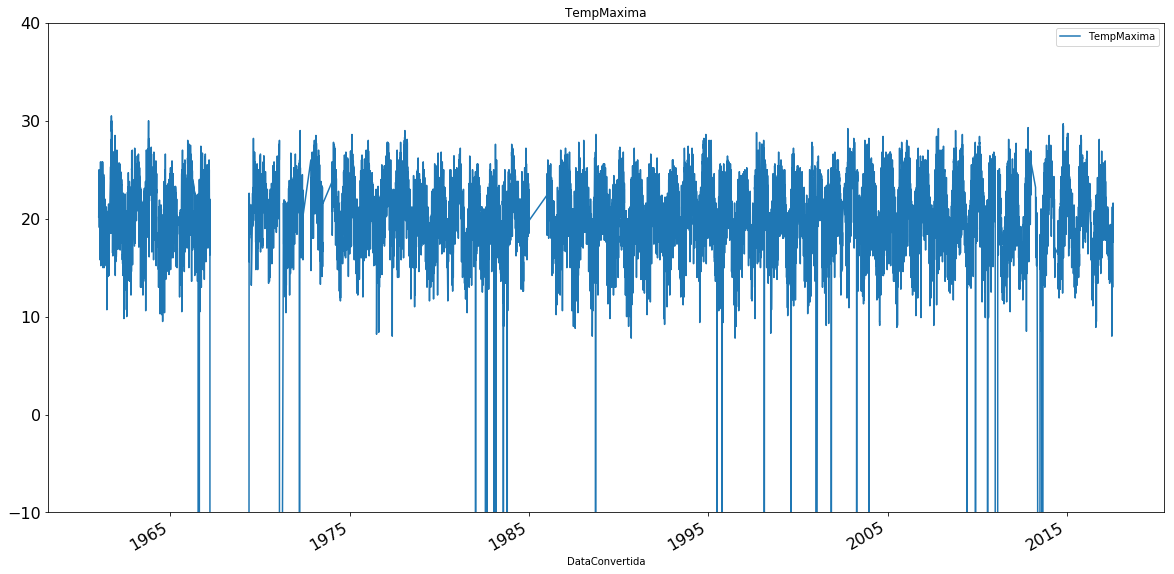

In [16]:
dfcor.plot(x='DataConvertida', y='TempMaxima', kind='line', title='TempMaxima', figsize=(20,10), ylim=[-10, 40], fontsize=16)
# dfcor.plot(x='DataConvertida', y='TempMaxima', kind='line', title='TempMaxima', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-10, 40], fontsize=16)

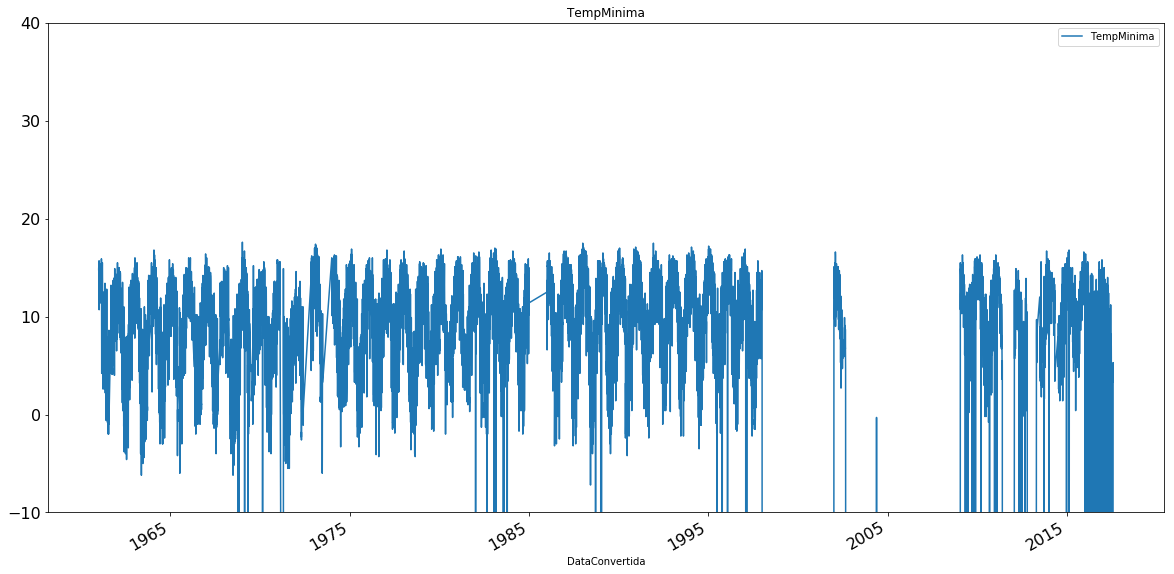

In [17]:
#TempMinima
dfcor.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), ylim=[-10, 40], fontsize=16)
#dfcor.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-10, 40], fontsize=16)
#dfcor.plot(x='DataConvertida', y='TempMinima', kind='line', title='TempMinima', figsize=(20,10), xlim=[pd.Timestamp('1992-01-01'), pd.Timestamp('1994-12-31')], ylim=[-10, 40], fontsize=16)

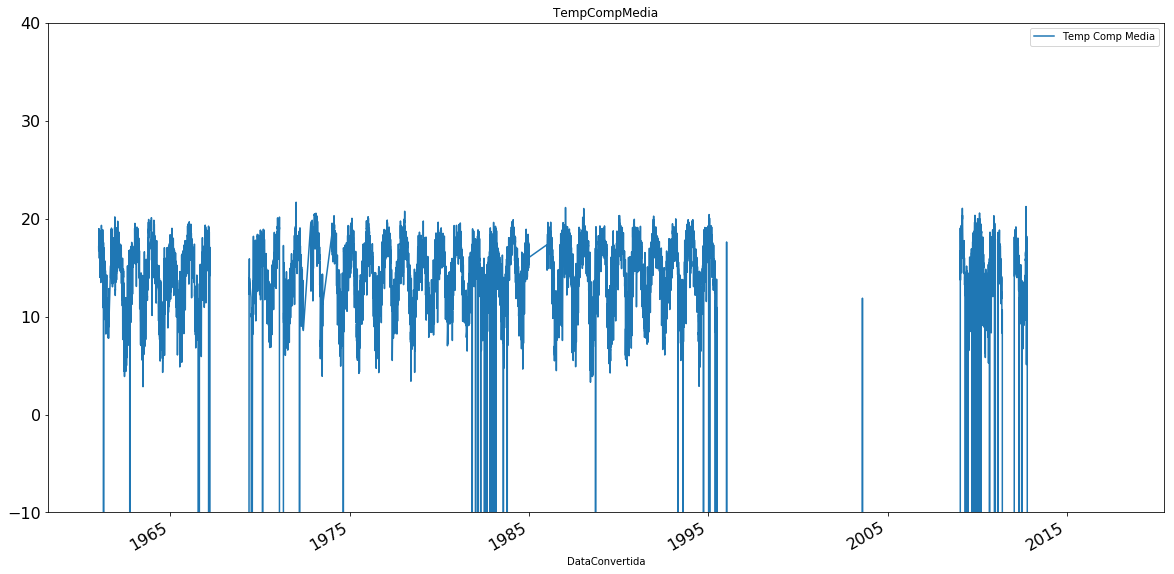

In [18]:
#TempCompMedia
dfcor.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), ylim=[-10, 40], fontsize=16)
#dfcor.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), xlim=[pd.Timestamp('2014-01-01'), pd.Timestamp('2016-12-31')], ylim=[-10, 40], fontsize=16)
#dfcor.plot(x='DataConvertida', y='Temp Comp Media', kind='line', title='TempCompMedia', figsize=(20,10), xlim=[pd.Timestamp('1991-01-01'), pd.Timestamp('1992-12-31')], ylim=[-10, 40], fontsize=16)

In [20]:
dfcor.head()

,Estacao,Data,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,TempMinima,Precipitacao,DataConvertida
0,83714,01/01/1961,20.2,0.0,-100.0,17.12,94.75,3.000000,14.8,-100.0,1961-01-01
1,83714,02/01/1961,20.3,0.0,0.2,16.74,99.50,3.666667,15.0,16.3,1961-01-02
2,83714,03/01/1961,23.8,0.0,0.2,18.96,92.25,2.333333,14.8,27.9,1961-01-03
3,83714,04/01/1961,23.5,0.0,1.6,17.24,93.50,2.333333,13.2,0.0,1961-01-04
4,83714,05/01/1961,21.2,0.0,1.0,16.78,94.25,2.333333,12.4,27.8,1961-01-05


In [23]:
dfPlot = dfcor.set_index('DataConvertida')
dfPlot.drop(dfPlot.columns[[0,1,3,4,6,7,9]], axis=1, inplace=True)
dfPlot.head()

,TempMaxima,Temp Comp Media,TempMinima
DataConvertida,,,
1961-01-01,20.2,17.12,14.8
1961-01-02,20.3,16.74,15.0
1961-01-03,23.8,18.96,14.8
1961-01-04,23.5,17.24,13.2
1961-01-05,21.2,16.78,12.4


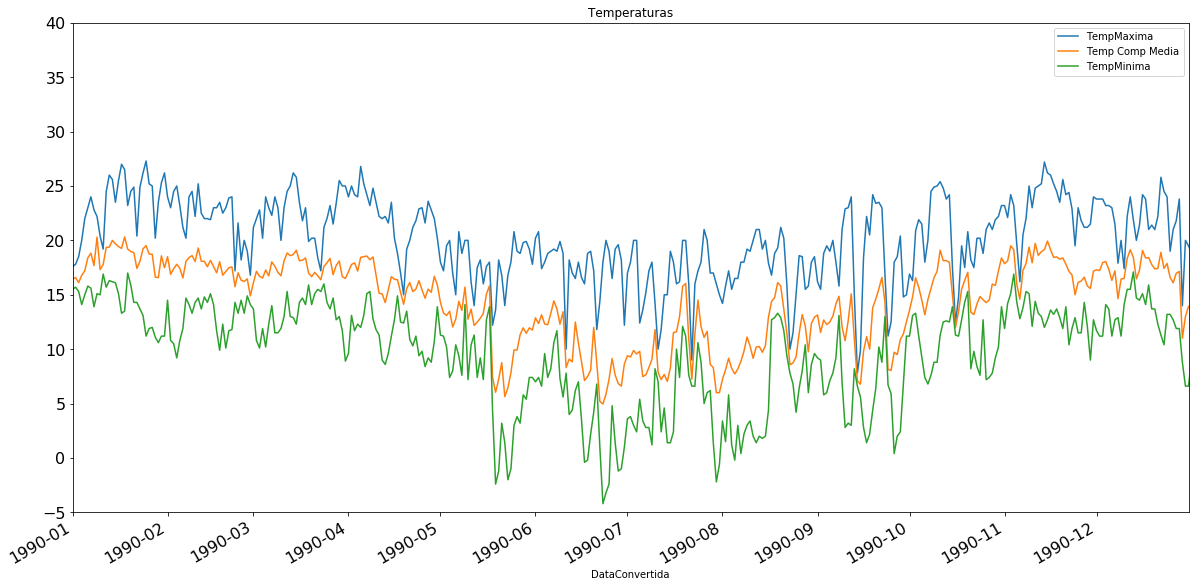

In [24]:
#temperaturas
dfPlot.plot(title='Temperaturas', figsize=(20,10), xlim=[pd.Timestamp('1990-01-01'), pd.Timestamp('1990-12-31')], ylim=[-5, 40], fontsize=16)

# criando variáveis secundárias

In [25]:
#Criando variavel Amplitude Termica

dfPlot['AmplitudeTermica'] = dfPlot.TempMaxima.replace(-100,np.nan) - dfPlot.TempMinima.replace(-100,np.nan)
dfPlot.head()
# dfPlot.plot(y='AmplitudeTermica', title='Amplitude Terminca', kind='line', figsize=(20,10), xlim=[pd.Timestamp('1990-01-01'), pd.Timestamp('1995-12-31')], ylim=[-5, 40], fontsize=16)

,TempMaxima,Temp Comp Media,TempMinima,AmplitudeTermica
DataConvertida,,,,
1961-01-01,20.2,17.12,14.8,5.4
1961-01-02,20.3,16.74,15.0,5.3
1961-01-03,23.8,18.96,14.8,9.0
1961-01-04,23.5,17.24,13.2,10.3
1961-01-05,21.2,16.78,12.4,8.8


# organizando dataset

In [28]:
#Mantendo apenas variaveis que iremos explorar: Precipitacao
dfexp = dfcor.set_index('DataConvertida')
dfexp['AmplitudeTermica'] = dfexp.TempMaxima - dfexp.TempMinima
dfexp.drop(dfexp.columns[[0,1,2,3,4,5,6,7,8]], axis=1, inplace=True)
dfexp.head()

,Precipitacao,AmplitudeTermica
DataConvertida,,
1961-01-01,-100.0,5.4
1961-01-02,16.3,5.3
1961-01-03,27.9,9.0
1961-01-04,0.0,10.3
1961-01-05,27.8,8.8


# analisando dados

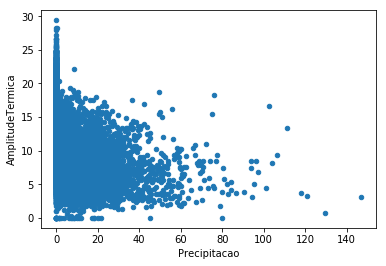

In [29]:
#Verificando correlacao entre precipitacao e amplitude termica
dfexp[(dfexp.Precipitacao>=0) & (dfexp.AmplitudeTermica>=0) & (dfexp.AmplitudeTermica<100)].plot(kind='scatter', x='Precipitacao', y='AmplitudeTermica')

In [30]:
dfexp[(dfexp.Precipitacao>=0) & (dfexp.AmplitudeTermica>=0) & (dfexp.AmplitudeTermica<100)].corr(method='pearson')['Precipitacao']

Precipitacao        1.000000
AmplitudeTermica   -0.370979
Name: Precipitacao, dtype: float64

## hipótese: variação da chuva no inverno é comportada o suficiente para planejar número mínimo de atividades ao ar livre

In [32]:
#Observando mais de perto os ultimos 5 anos
inverno2006 = dfexp.Precipitacao[pd.Timestamp('2006-05-01'):pd.Timestamp('2006-09-01')]
inverno2006 = inverno2006.reset_index(drop=True)
inverno2007 = dfexp.Precipitacao[pd.Timestamp('2007-05-01'):pd.Timestamp('2007-09-01')]
inverno2007 = inverno2007.reset_index(drop=True)
inverno2008 = dfexp.Precipitacao[pd.Timestamp('2008-05-01'):pd.Timestamp('2008-09-01')]
inverno2008 = inverno2008.reset_index(drop=True)
inverno2009 = dfexp.Precipitacao[pd.Timestamp('2009-05-01'):pd.Timestamp('2009-09-01')]
inverno2009 = inverno2009.reset_index(drop=True)
inverno2010 = dfexp.Precipitacao[pd.Timestamp('2010-05-01'):pd.Timestamp('2010-09-01')]
inverno2010 = inverno2010.reset_index(drop=True)

dfInverno = pd.DataFrame({'inverno2006' : inverno2006, 'inverno2007' : inverno2007, 'inverno2008' : inverno2008, 'inverno2009' : inverno2009, 'inverno2010' : inverno2010})
dfInverno.replace(-100, np.nan, inplace=True)
dfInverno[20:40]

,inverno2006,inverno2007,inverno2008,inverno2009,inverno2010
20,0.0,2.2,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0
22,10.0,24.1,0.0,0.0,0.0
23,7.3,14.4,0.0,0.0,0.0
24,2.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.1,0.2
26,0.0,0.2,0.0,13.8,11.1
27,0.0,1.7,0.0,0.6,0.0
28,0.0,0.1,0.0,27.8,0.0
29,0.0,1.3,1.0,0.0,0.0


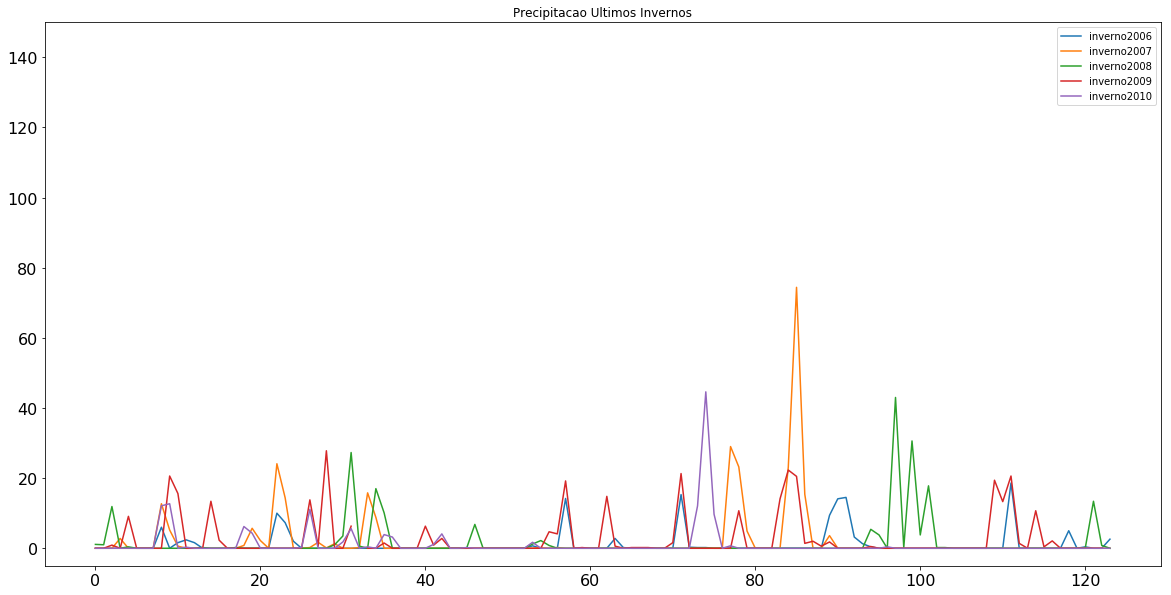

In [33]:
dfInverno.plot(title='Precipitacao Ultimos Invernos', kind='line', figsize=(20,10), ylim=[-5, 150], fontsize=16)

In [34]:
#Analisando ultimos 11 invernos em detalhe
inverno2011 = dfexp.Precipitacao[pd.Timestamp('2011-05-01'):pd.Timestamp('2011-09-01')]
inverno2011 = inverno2011.reset_index(drop=True)
inverno2012 = dfexp.Precipitacao[pd.Timestamp('2012-05-01'):pd.Timestamp('2012-09-01')]
inverno2012 = inverno2012.reset_index(drop=True)
inverno2013 = dfexp.Precipitacao[pd.Timestamp('2013-05-01'):pd.Timestamp('2013-09-01')]
inverno2013 = inverno2013.reset_index(drop=True)
inverno2014 = dfexp.Precipitacao[pd.Timestamp('2014-05-01'):pd.Timestamp('2014-09-01')]
inverno2014 = inverno2014.reset_index(drop=True)
inverno2015 = dfexp.Precipitacao[pd.Timestamp('2015-05-01'):pd.Timestamp('2015-09-01')]
inverno2015 = inverno2015.reset_index(drop=True)
inverno2016 = dfexp.Precipitacao[pd.Timestamp('2016-05-01'):pd.Timestamp('2016-09-01')]
inverno2016 = inverno2016.reset_index(drop=True)

dfInverno = pd.DataFrame({'inverno2006' : inverno2006, 'inverno2007' : inverno2007, 'inverno2008' : inverno2008, 'inverno2009' : inverno2009, 'inverno2010' : inverno2010, 'inverno2011' : inverno2011, 'inverno2012' : inverno2012, 'inverno2013' : inverno2013, 'inverno2014' : inverno2014, 'inverno2015' : inverno2015, 'inverno2016' : inverno2016})

dfInverno.replace(-100, np.nan, inplace=True)
dfInverno[20:40]

,inverno2006,inverno2007,inverno2008,inverno2009,inverno2010,inverno2011,inverno2012,inverno2013,inverno2014,inverno2015,inverno2016
20,0.0,2.2,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3.2,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
22,10.0,24.1,0.0,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0
23,7.3,14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2.0,0.0,0.0,0.0,0.0,0.0,12.0,8.7,18.1,0.0,0.0
25,0.0,0.0,0.0,0.1,0.2,0.0,1.6,30.7,0.2,0.0,11.8
26,0.0,0.2,0.0,13.8,11.1,0.6,0.8,3.6,0.5,0.0,0.4
27,0.0,1.7,0.0,0.6,0.0,0.0,0.0,0.3,1.0,0.0,30.7
28,0.0,0.1,0.0,27.8,0.0,0.0,0.0,0.2,0.0,9.4,37.2
29,0.0,1.3,1.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,58.7


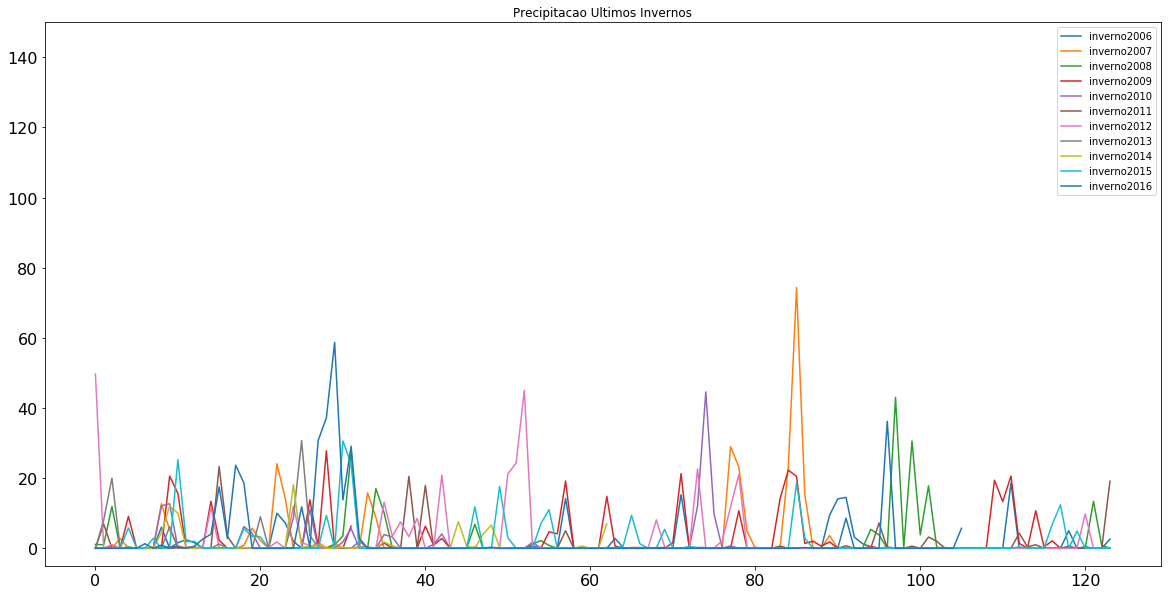

In [35]:
dfInverno.plot(title='Precipitacao Ultimos Invernos', kind='line', figsize=(20,10), ylim=[-5, 150], fontsize=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181208C9518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018121164E48>]], dtype=object)

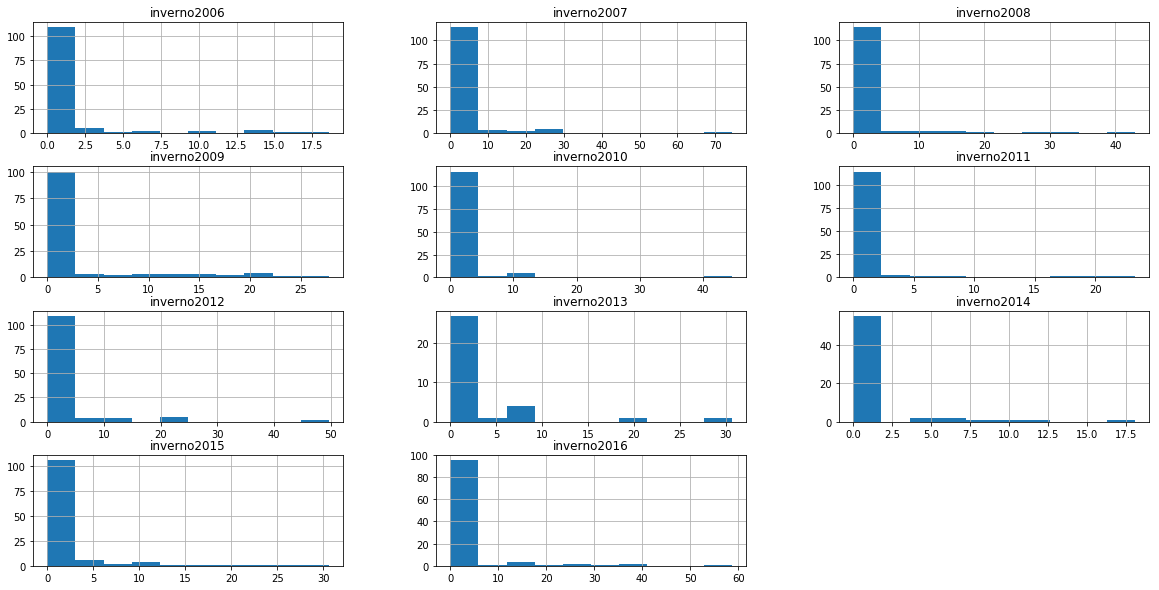

In [36]:
#Observando distribuicao da precipitacao por dia
dfInverno.hist(layout=(4,3), figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018121805AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000181214C1208>]], dtype=object)

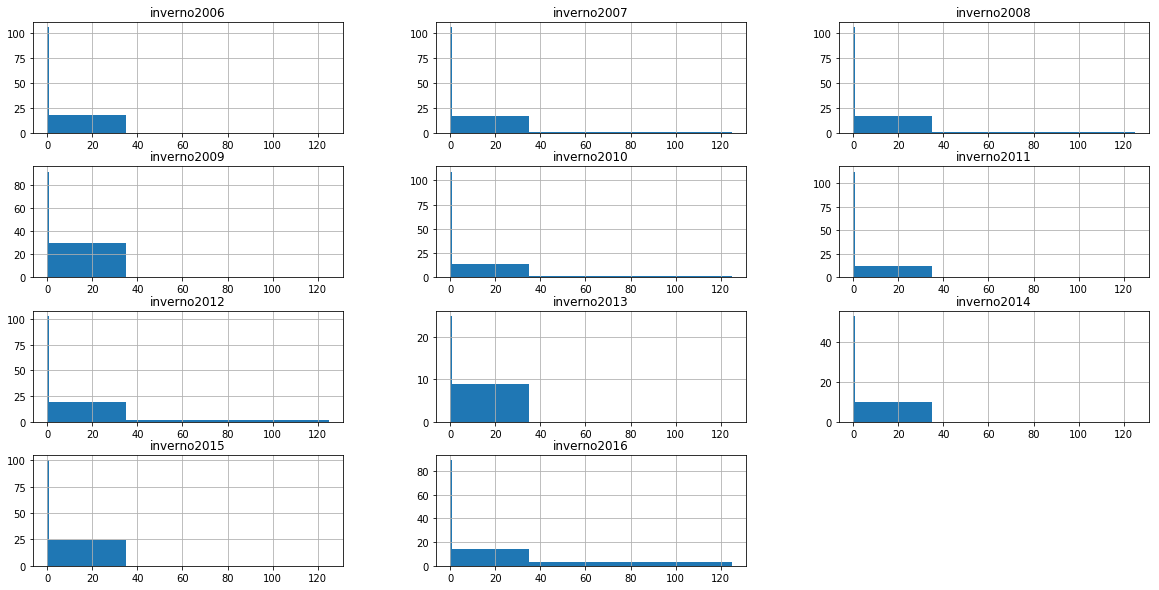

In [37]:
#Obsevando distribuicao evidenciando dias sem chuva
#dfInverno.hist(layout=(4,3), figsize=(20,10), bins=[0, 1, 5, 35, 65, 95, 125])
dfInverno.hist(layout=(4,3), figsize=(20,10), bins=[0, 1, 35, 125])

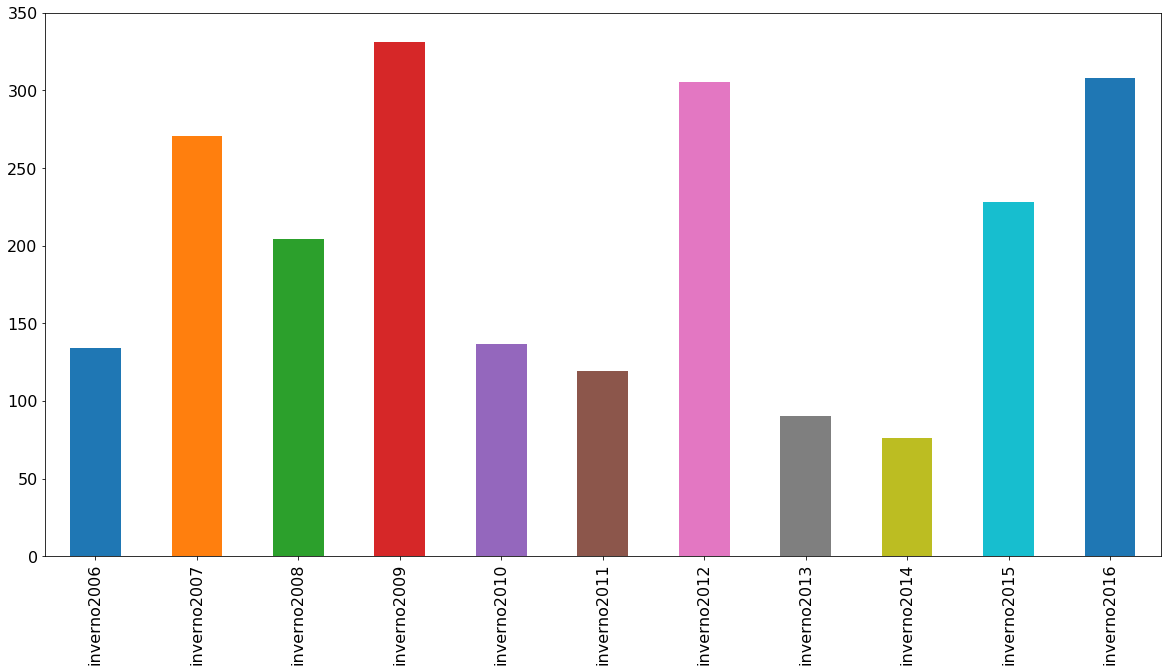

In [38]:
#Resumindo volume precipitado no inverno
dfInverno.sum().plot(kind='bar', figsize=(20,10), ylim=[0, 350], fontsize=16)

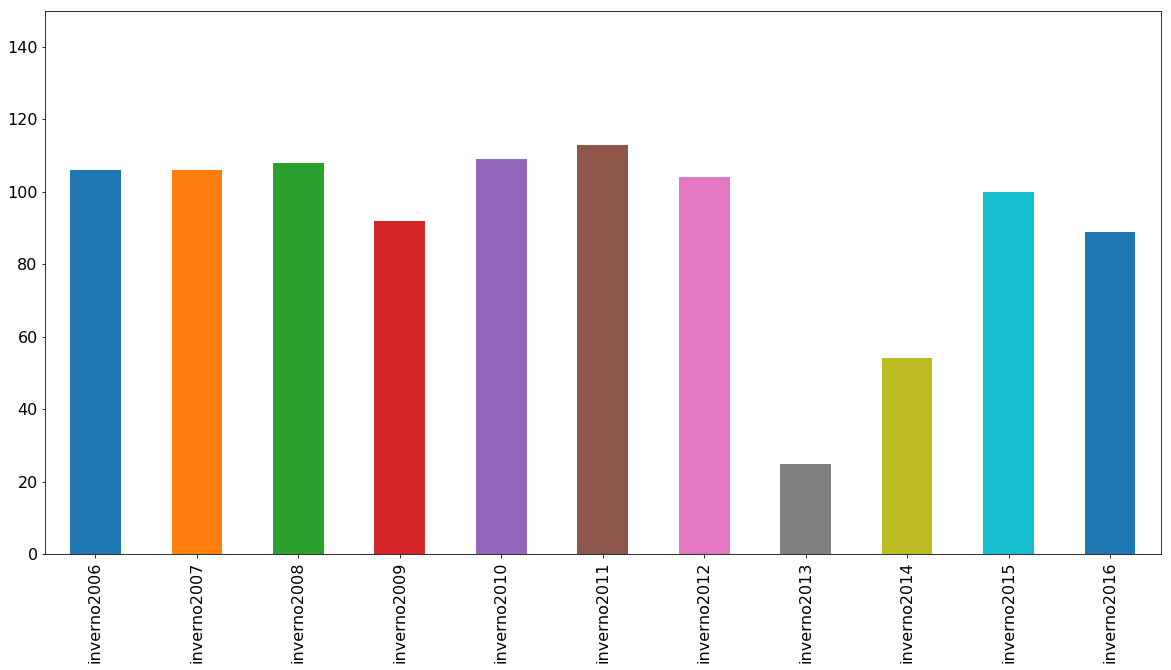

In [39]:
#Resumindo dias sem chuva
dfInverno[dfInverno<=1].count().plot(ylim=[0, 150], kind='bar', figsize=(20,10), fontsize=16)

In [40]:
#Resumindo variacao de dias sem chuva
vetDiasSemChuva = dfInverno[dfInverno<=1].count()
vetDiasSemChuva.describe()
#vetDiasSemChuva.mean()
#vetDiasSemChuva.std()

count     11.000000
mean      91.454545
std       27.431236
min       25.000000
25%       90.500000
50%      104.000000
75%      107.000000
max      113.000000
dtype: float64

# resultados

In [41]:
#Relativando variacao de dias sem chuva
#Porcentagem media de dias sem chuva no inverno, segundo ultimos 10 anos
vetDiasSemChuva.mean()/dfInverno.inverno2006.count()

0.73753665689149561

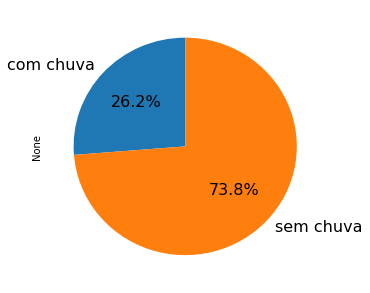

In [42]:
#Plot
pd.Series([1-vetDiasSemChuva.mean()/dfInverno.inverno2006.count(),vetDiasSemChuva.mean()/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, figsize=(5,5), fontsize=16, autopct='%1.1f%%')

In [43]:
#Coeficiente de variacao
vetDiasSemChuva.std()/vetDiasSemChuva.mean()

0.29994393614952702

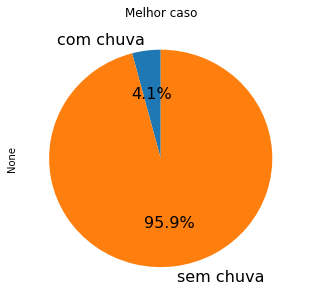

In [44]:
#Plot melhor caso
pd.Series([1-(vetDiasSemChuva.mean()+vetDiasSemChuva.std())/dfInverno.inverno2006.count(),(vetDiasSemChuva.mean()+vetDiasSemChuva.std())/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, title='Melhor caso', figsize=(5,5), fontsize=16, autopct='%1.1f%%')

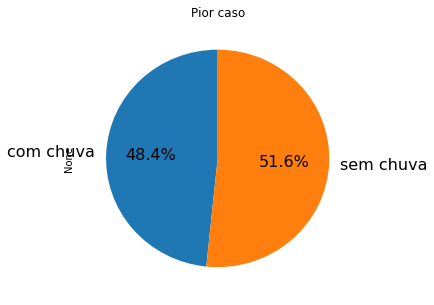

In [45]:
#Plot pior caso
pd.Series([1-(vetDiasSemChuva.mean()-vetDiasSemChuva.std())/dfInverno.inverno2006.count(),(vetDiasSemChuva.mean()-vetDiasSemChuva.std())/dfInverno.inverno2006.count()]).plot(kind='pie', labels=['com chuva','sem chuva'], startangle=90, shadow=False, fontsize=16, title='Pior caso', figsize=(5,5), autopct='%1.1f%%')